<a href="https://colab.research.google.com/github/devdebdeb/ML-Classificacao/blob/main/Otimiza%C3%A7%C3%A3o_de_modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-optimize -q

import sklearn
import pandas
import matplotlib
import skopt
import plotly
import numpy

print(f'versão do sklearn = {sklearn.__version__}')
print(f'versão do pandas = {pandas.__version__}')
print(f'versão do matplotlib = {matplotlib.__version__}')
print(f'versão do skopt = {skopt.__version__}')
print(f'versão do plotly = {plotly.__version__}')
print(f'versão do numpy = {numpy.__version__}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.9 MB/s eta 0:00:00
versão do sklearn = 1.3.2
versão do pandas = 2.1.4
versão do matplotlib = 3.7.1
versão do skopt = 0.10.2
versão do plotly = 5.15.0
versão do numpy = 1.26.4


#Conhecendo os dados

In [ ]:
rs = 42

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/dados_inadimplencia.csv')
data.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [ ]:
round(data['inadimplente'].value_counts(normalize=True)*100, 2)

,proportion
inadimplente,
0,67.65
1,32.35


In [ ]:
X = data.drop('inadimplente', axis=1)
y = data['inadimplente']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=rs, stratify=y)

#Construindo os modelos

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
model_dt = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_dt = recall_score(y_test, model_dt.predict(X_test))
print(f"recall dt: {recall_dt:.3f}")

recall dt: 0.143


##LogisticRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
recall_lr = recall_score(y_test, logistic_pipeline.predict(X_test))
print(f'recall do lr: {recall_lr:.3f}')

recall do lr: 0.253


#Busca em grade - Otimização de hiper parâmetros

## DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np

param_grid_dt = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = StratifiedKFold(shuffle=True, random_state=rs)

dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=rs),
             param_grid=param_grid_dt,
             scoring="recall",
             n_jobs=-1,
             cv=cv
             )

dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

Melhores parâmetros de acordo com GridSearch

In [ ]:
dt_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
df_cv_results_dt = pd.DataFrame(dt_grid_search.cv_results_)
df_cv_results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022165,0.003719,0.008516,0.001120,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.008017,0.000373,0.007055,0.000391,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.017334,0.000933,0.007538,0.000477,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
3,0.007825,0.000516,0.007069,0.000362,gini,6,sqrt,5,10,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
4,0.017837,0.001206,0.008172,0.001411,gini,6,sqrt,5,15,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.200949,0.145570,0.180380,0.164557,0.204114,0.179114,0.022093,277


In [ ]:
df_cv_results_dt.loc[[dt_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.026698,0.001745,0.007677,0.000423,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


### Analisar informações obtidas

In [ ]:
import matplotlib.pyplot as plt

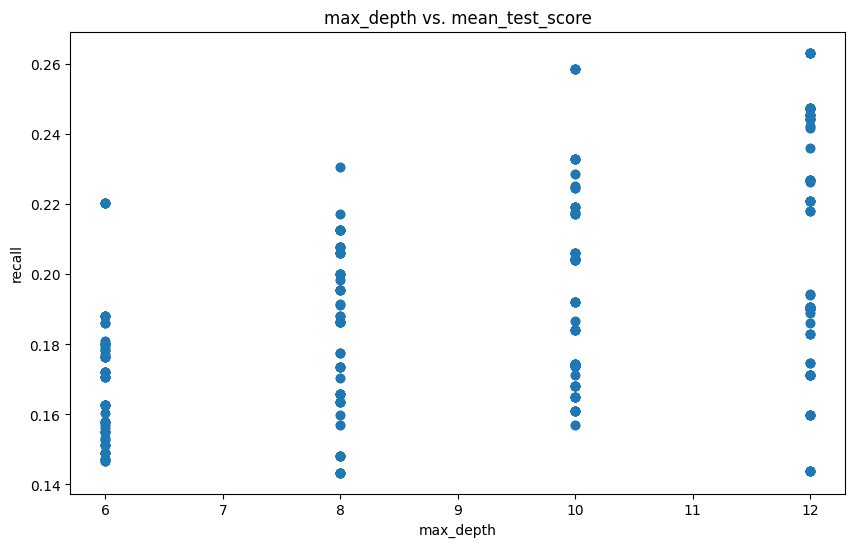

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_max_depth'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('max_depth vs. mean_test_score')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.show()

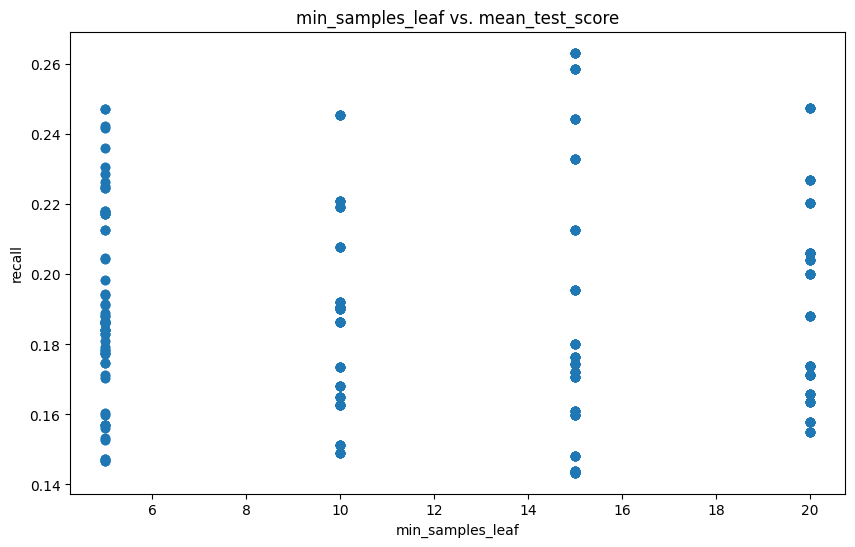

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_dt['param_min_samples_leaf'],
    df_cv_results_dt['mean_test_score'],
    )

plt.title('min_samples_leaf vs. mean_test_score')
plt.xlabel('min_samples_leaf')
plt.ylabel('recall')
plt.show()

## LogisticRegression

In [ ]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

In [ ]:
lr_grid_search = GridSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
             param_grid=param_grid_lr,
             scoring="recall",
             n_jobs=-1,
             cv=cv
             )

lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [ ]:
lr_grid_search.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [ ]:
df_cv_results_lr = pd.DataFrame(lr_grid_search.cv_results_)
df_cv_results_lr.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062857,0.018153,0.011159,0.004534,0.001,100,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
1,0.021667,0.003888,0.008746,0.000832,0.001,100,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
2,0.038744,0.002093,0.008612,0.000568,0.001,150,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86


In [ ]:
df_cv_results_lr.loc[[lr_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.022362,0.001587,0.008093,0.000148,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


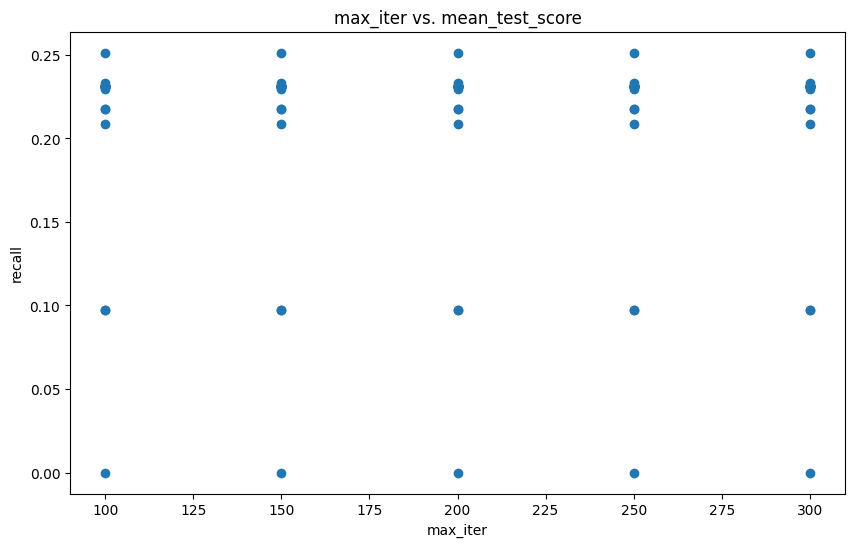

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_lr['param_logisticregression__max_iter'],
    df_cv_results_lr['mean_test_score'],
    )

plt.title('max_iter vs. mean_test_score')
plt.xlabel('max_iter')
plt.ylabel('recall')
plt.show()

## KNN

In [ ]:
from numpy import linspace
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Definindo a grade de hiperparâmetros
param_grid_knn = {
    'knn__n_neighbors': linspace(5, 25, 10, dtype=int),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_grid_search = GridSearchCV(estimator = pipe_knn,
                               param_grid = param_grid_knn,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = cv)

knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': array([ 5,  7,  9, 11, 13, 16, 18, 20, 22, 25]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='recall')

### KNN Metrics

In [ ]:
knn_grid_search.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [ ]:
df_cv_results_knn = pd.DataFrame(knn_grid_search.cv_results_)
df_cv_results_knn.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028654,0.001976,0.601962,0.020597,euclidean,5,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.327532,0.324367,0.363924,0.324367,0.294304,0.326899,0.022120,10
1,0.025841,0.000749,0.407426,0.017975,euclidean,5,distance,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.371835,0.362342,0.379747,0.351266,0.318038,0.356646,0.021524,2
2,0.025802,0.000505,0.577963,0.017165,euclidean,7,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.310127,0.306962,0.337025,0.316456,0.319620,0.318038,0.010496,15


In [ ]:
df_cv_results_knn.loc[[knn_grid_search.best_index_]]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.028573,0.00177,0.650409,0.034161,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.375,0.370253,0.373418,0.356013,0.357595,0.366456,0.008043,1


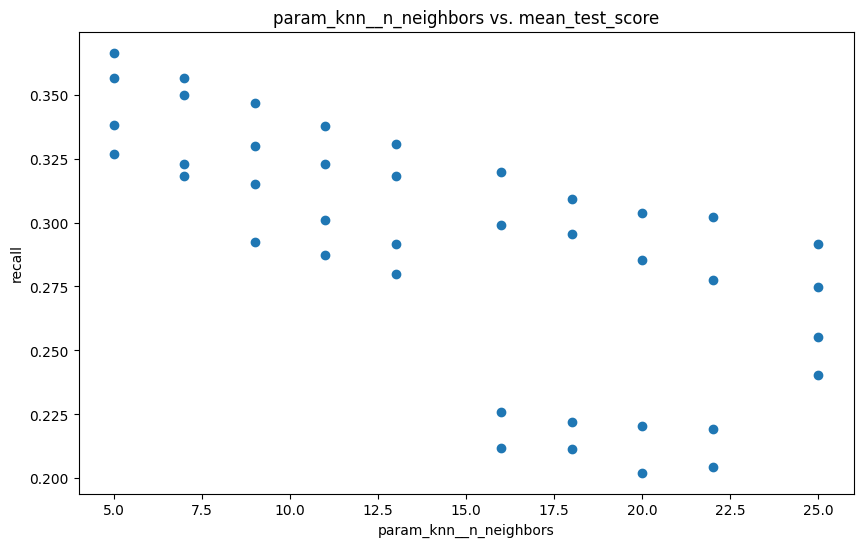

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(
    df_cv_results_knn['param_knn__n_neighbors'],
    df_cv_results_knn['mean_test_score'],
    )

plt.title('param_knn__n_neighbors vs. mean_test_score')
plt.xlabel('param_knn__n_neighbors')
plt.ylabel('recall')
plt.show()

### KNN model

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [ ]:
knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [ ]:
print(f'KNN, recall score: {recall_score(y_test, y_pred):.3f}')

KNN, recall score: 0.371


# Nested CV - Validação cruzada aninhada

##DecisionTreeClassifier

In [ ]:
inner_cv = StratifiedKFold(shuffle=True, random_state=rs)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=rs)

In [ ]:
from sklearn.model_selection import cross_val_score

dt_nested_gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=rs),
             param_grid=param_grid_dt,
             scoring="recall",
             n_jobs=-1,
             cv=inner_cv
             )

dt_nested_scores = cross_val_score(dt_nested_gs, X_train, y_train, cv=outer_cv)

In [ ]:
print(f'Resultado de cada iteração do cv externo: {dt_nested_scores}')
print(f'Média: {dt_nested_scores.mean()}')

Resultado de cada iteração do cv externo: [0.23646724 0.24762808 0.20512821]
Média: 0.2297411750289676


## LogisticRegression

In [ ]:
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

param_grid_lr = [
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

In [ ]:
lr_nested_gs = GridSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
                            param_grid=param_grid_lr,
                            scoring="recall",
                            n_jobs=-1,
                            cv=inner_cv
                            )

lr_nested_scores=cross_val_score(lr_nested_gs, X_train, y_train, cv=outer_cv)

In [ ]:
print('Resultado de cada iteração do cv externo: ', lr_nested_scores)
print('Média: ', lr_nested_scores.mean())

lr_nested_gs.fit(X_train, y_train)
best_params = lr_nested_gs.best_params_

print('Melhores hiperparâmetros: ', best_params)

Resultado de cada iteração do cv externo:  [0.24691358 0.27703985 0.2374169 ]
Média:  0.2537901108426093
Melhores hiperparâmetros:  {'logisticregression__C': 0.001, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


#Randomized Search CV - Busca em grade aleatória

## DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rs_dt = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=rs),
                   param_distributions=param_grid_dt,
                   n_iter=100,
                   scoring="recall",
                   n_jobs=-1,
                   cv=inner_cv,
                   random_state=rs
                   )

rs_dt_nested_score = cross_val_score(rs_dt, X_train, y_train, cv=outer_cv)

In [ ]:
print('Resultado de cada iteração do cv externo: ', rs_dt_nested_score)
print('Média: ', rs_dt_nested_score.mean())

Resultado de cada iteração do cv externo:  [0.23646724 0.18975332 0.21272555]
Média:  0.21298203440307595


In [ ]:
rs_dt.fit(X_train, y_train)
rs_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

## Logistic Regression

In [ ]:
rs_lr = RandomizedSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
                   param_distributions=param_grid_lr,
                   n_iter=50,
                   scoring="recall",
                   n_jobs=-1,
                   cv=inner_cv,
                   random_state=rs
                   )

rs_lr_nested_score = cross_val_score(rs_lr, X_train, y_train, cv=outer_cv)

print('Resultado de cada iteração do cv externo: ', rs_lr_nested_score)
print('Média: ', rs_lr_nested_score.mean())

Resultado de cada iteração do cv externo:  [0.24691358 0.27703985 0.2374169 ]
Média:  0.2537901108426093


In [ ]:
rs_lr.fit(X_train,y_train)
rs_lr.best_params_

{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 150,
 'logisticregression__C': 0.001}

#Otimização Bayesiana

## DecisionTreeClassifier

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.8 MB/s eta 0:00:00


In [ ]:
from skopt.space import Real, Integer, Categorical

space_dt = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12),
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}

In [ ]:
from skopt import BayesSearchCV

In [ ]:
opt_dt = BayesSearchCV(estimator=DecisionTreeClassifier(random_state=rs),
              search_spaces=space_dt,
              n_iter=50,
              scoring="recall",
              n_jobs=-1,
              cv=inner_cv,
              random_state=rs
              )

bs_dt_nested_score = cross_val_score(opt_dt, X_train,y_train, cv=outer_cv)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['entropy', 11, 'log2', 20, 5, 'best'] before, using random point ['entropy', 7, 'log2', 14, 15, 'random']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 11, 'log2', 20, 5, 'best'] before, using random point ['entropy', 11, 'log2', 16, 16, 'best']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['entropy', 12, 'log2', 20, 5, 'best'] before, using random point ['gini', 6, 'log2', 8, 15, 'best']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 12, 'log2', 20, 5, 'best'] before, using random point ['entropy', 11, 'log2', 16, 17, 'best']
  warnings.warn(
/u

In [ ]:
print('Resultado de cada iteração do cv externo: ', bs_dt_nested_score)
print('Média: ', bs_dt_nested_score.mean())

Resultado de cada iteração do cv externo:  [0.23931624 0.31973435 0.20512821]
Média:  0.25472626326516273


In [ ]:
opt_dt.fit(X_train, y_train)
opt_dt.best_params_

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 12, 'sqrt', 20, 20, 'best'] before, using random point ['entropy', 11, 'log2', 16, 16, 'best']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['gini', 12, 'sqrt', 20, 5, 'best'] before, using random point ['entropy', 7, 'log2', 12, 9, 'best']
  warnings.warn(


OrderedDict([('criterion', 'gini'),
             ('max_depth', 12),
             ('max_features', 'log2'),
             ('min_samples_leaf', 15),
             ('min_samples_split', 5),
             ('splitter', 'best')])

## Logistic Regression

In [ ]:
max_iter = Integer(100, 300)
c = Categorical([0.001, 0.01, 0.1, 1, 10])

space_lr = [
    {
        'logisticregression__solver': Categorical(['newton-cg', 'lbfgs']),
        'logisticregression__penalty': Categorical(['l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
    {
        'logisticregression__solver': Categorical(['liblinear']),
        'logisticregression__penalty': Categorical(['l1', 'l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
]

In [ ]:
opt_lr = BayesSearchCV(estimator=make_pipeline(StandardScaler(), LogisticRegression()),
            search_spaces = space_lr,
            n_iter=50,
            scoring='recall',
            n_jobs=-1,
            cv=inner_cv,
            random_state=rs)

In [ ]:
bs_lr_nested_scores=cross_val_score(opt_lr, X_train, y_train, cv=outer_cv)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 148, 'l2', 'newton-cg'] before, using random point [0.01, 220, 'l2', 'lbfgs']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 300, 'l2', 'liblinear'] before, using random point [0.001, 224, 'l1', 'liblinear']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 148, 'l2', 'newton-cg'] before, using random point [0.01, 220, 'l2', 'lbfgs']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 148, 'l2', 'newton-cg'] before, using random point [0.01, 220, 'l2', 'lbfgs']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517:

In [ ]:
print('Resultado de cada iteração do cv externo: ', bs_lr_nested_scores)
print('Média: ', bs_lr_nested_scores.mean())

Resultado de cada iteração do cv externo:  [0.24691358 0.27703985 0.2374169 ]
Média:  0.2537901108426093


In [ ]:
opt_lr.fit(X_train, y_train)
opt_lr.best_params_

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 148, 'l2', 'newton-cg'] before, using random point [0.01, 220, 'l2', 'lbfgs']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 300, 'l2', 'liblinear'] before, using random point [0.001, 289, 'l2', 'liblinear']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 300, 'l2', 'liblinear'] before, using random point [0.001, 224, 'l1', 'liblinear']
  warnings.warn(


OrderedDict([('logisticregression__C', 0.001),
             ('logisticregression__max_iter', 150),
             ('logisticregression__penalty', 'l2'),
             ('logisticregression__solver', 'liblinear')])

In [ ]:
y_pred = opt_lr.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

## KNN

In [ ]:
param_space_knn = {
    'knn__n_neighbors': (5, 25),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

In [ ]:
bs_pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_bayes_search = BayesSearchCV(estimator = bs_pipe_knn,
                               search_spaces = param_space_knn,
                               scoring = "recall",
                               n_jobs = -1,
                               cv = cv)

knn_bayes_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['euclidean', 21, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['manhattan', 6, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['manhattan', 9, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['manhattan', 8, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserW

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                        ('knn', KNeighborsClassifier())]),
              n_jobs=-1, scoring='recall',
              search_spaces={'knn__metric': ['euclidean', 'manhattan'],
                             'knn__n_neighbors': (5, 25),
                             'knn__weights': ['uniform', 'distance']})

In [ ]:
bs_knn_nested_scores=cross_val_score(knn_bayes_search, X_train, y_train, cv=outer_cv)

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['euclidean', 19, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['manhattan', 20, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['manhattan', 17, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'distance'] before, using random point ['euclidean', 25, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: 

In [ ]:
print('Resultado de cada iteração do cv externo: ', bs_knn_nested_scores)
print('Média: ', bs_knn_nested_scores.mean())

Resultado de cada iteração do cv externo:  [0.3637227  0.38519924 0.35327635]
Média:  0.3673994304397003


In [ ]:
knn_bayes_search.best_params_

OrderedDict([('knn__metric', 'manhattan'),
             ('knn__n_neighbors', 6),
             ('knn__weights', 'distance')])

In [ ]:
y_pred = knn_bayes_search.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])